# Measure Fidelity of (random) quantum circuit

In [1]:
# create mirrored circuits
from qiskit import QuantumCircuit
from qiskit.circuit.random import random_circuit
from qiskit.providers.fake_provider import FakeMumbaiV2

from qiskit import execute
from qiskit import Aer

from qiskit.visualization import plot_histogram

In [2]:
def reverse_and_compose(qc):
    """
    Creates circuit with qc + barrier + reverse(inverse(qc))

    Parameters
    ----------
    qc : QuantumCircuit
        The circuit to create the mirror for

    Returns
    -------
    composed circuit qc + barrier + reverse(inverse(qc))

    """
    circ_qc = QuantumCircuit(qc.num_qubits, qc.num_qubits)
    circ_qc = QuantumCircuit(num_qubits, num_qubits)
    circ_qc.compose(qc, inplace=True)
    circ_qc.barrier()
    circ_qc.compose(qc.inverse(), inplace=True)
    for qubit in range(qc.num_qubits):
        circ_qc.measure(qubit, qubit)
    
    return circ_qc

## Random Circuit

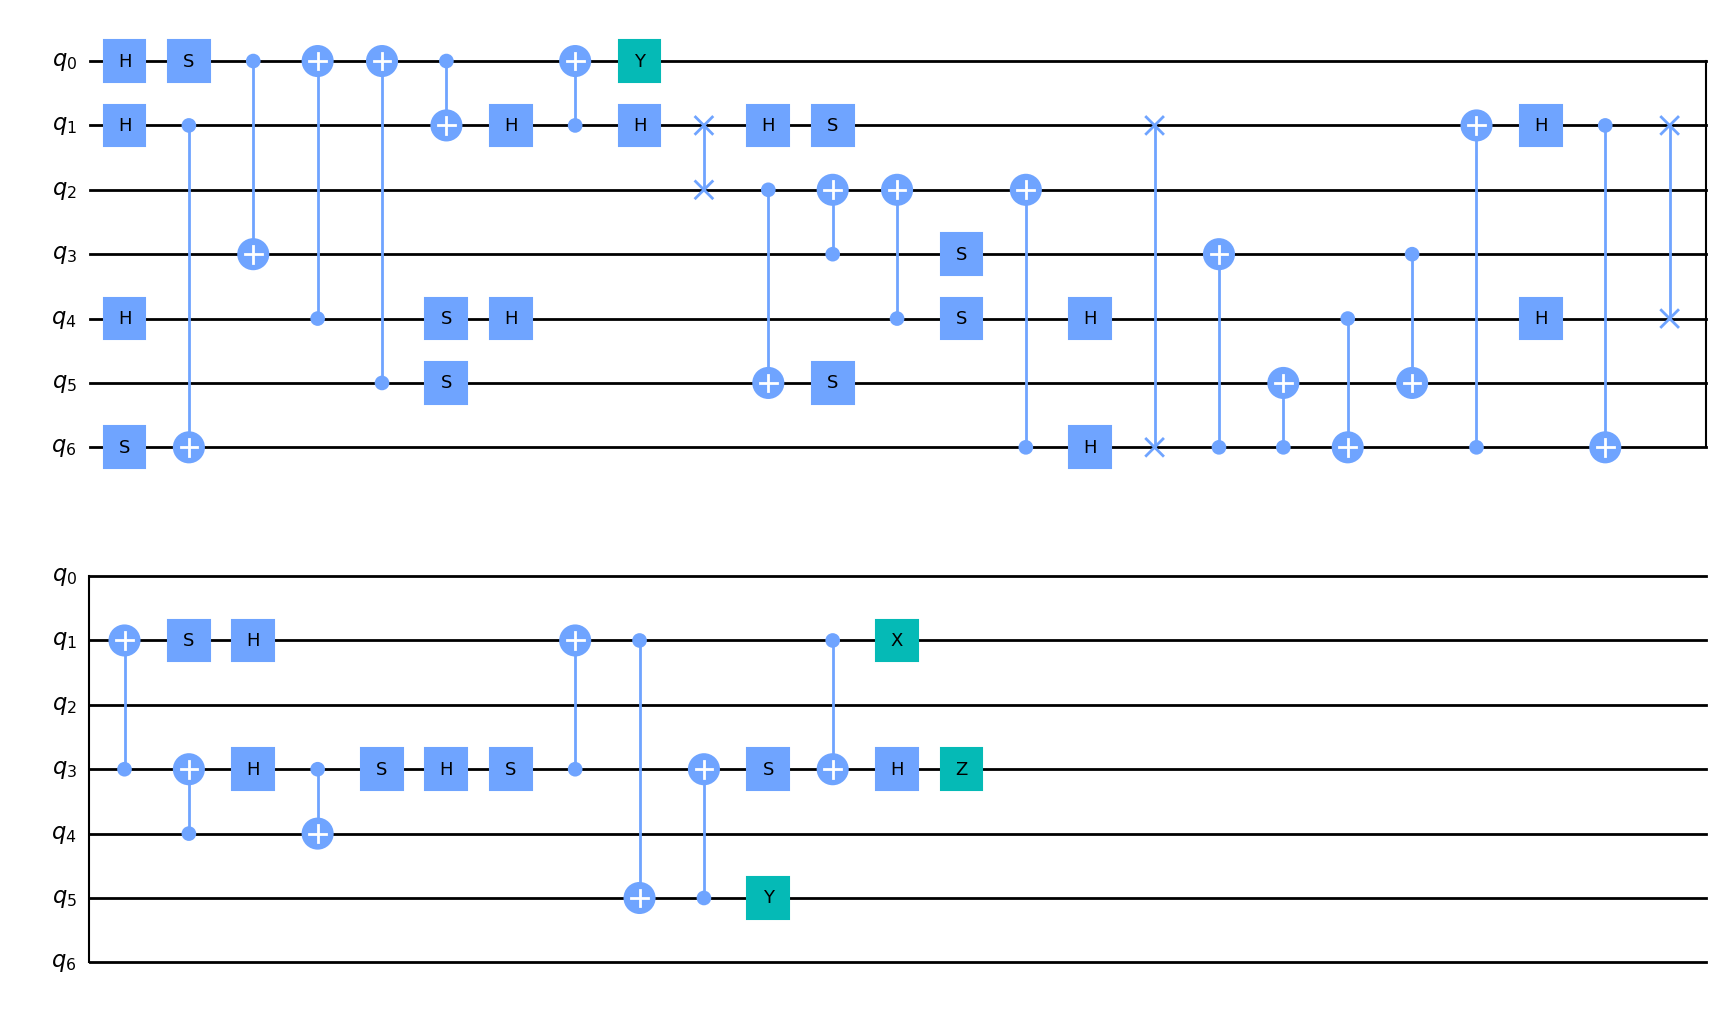

In [3]:
# create dummy ciruit with num_qubits and num_depth

num_qubits = 7
num_reps = 5
seed = 123

#test circuit
#rand_circ = random_circuit(num_qubits, num_reps, measure=False)

from qiskit.quantum_info import random_clifford
from qiskit.quantum_info import Clifford

rand_circ = QuantumCircuit(num_qubits)
U = random_clifford(num_qubits,seed=seed)
U = U.to_circuit()
rand_circ.compose(U, qubits=[0,1,2,3,4,5,6], inplace=True)
#rand_cirq.draw("mpl")
rand_circ.draw('mpl')

In [4]:
# information about graph_state_circuit
print("Depth: ", rand_circ.decompose().depth())
print("Gates: ", rand_circ.decompose().size())

Depth:  43
Gates:  63


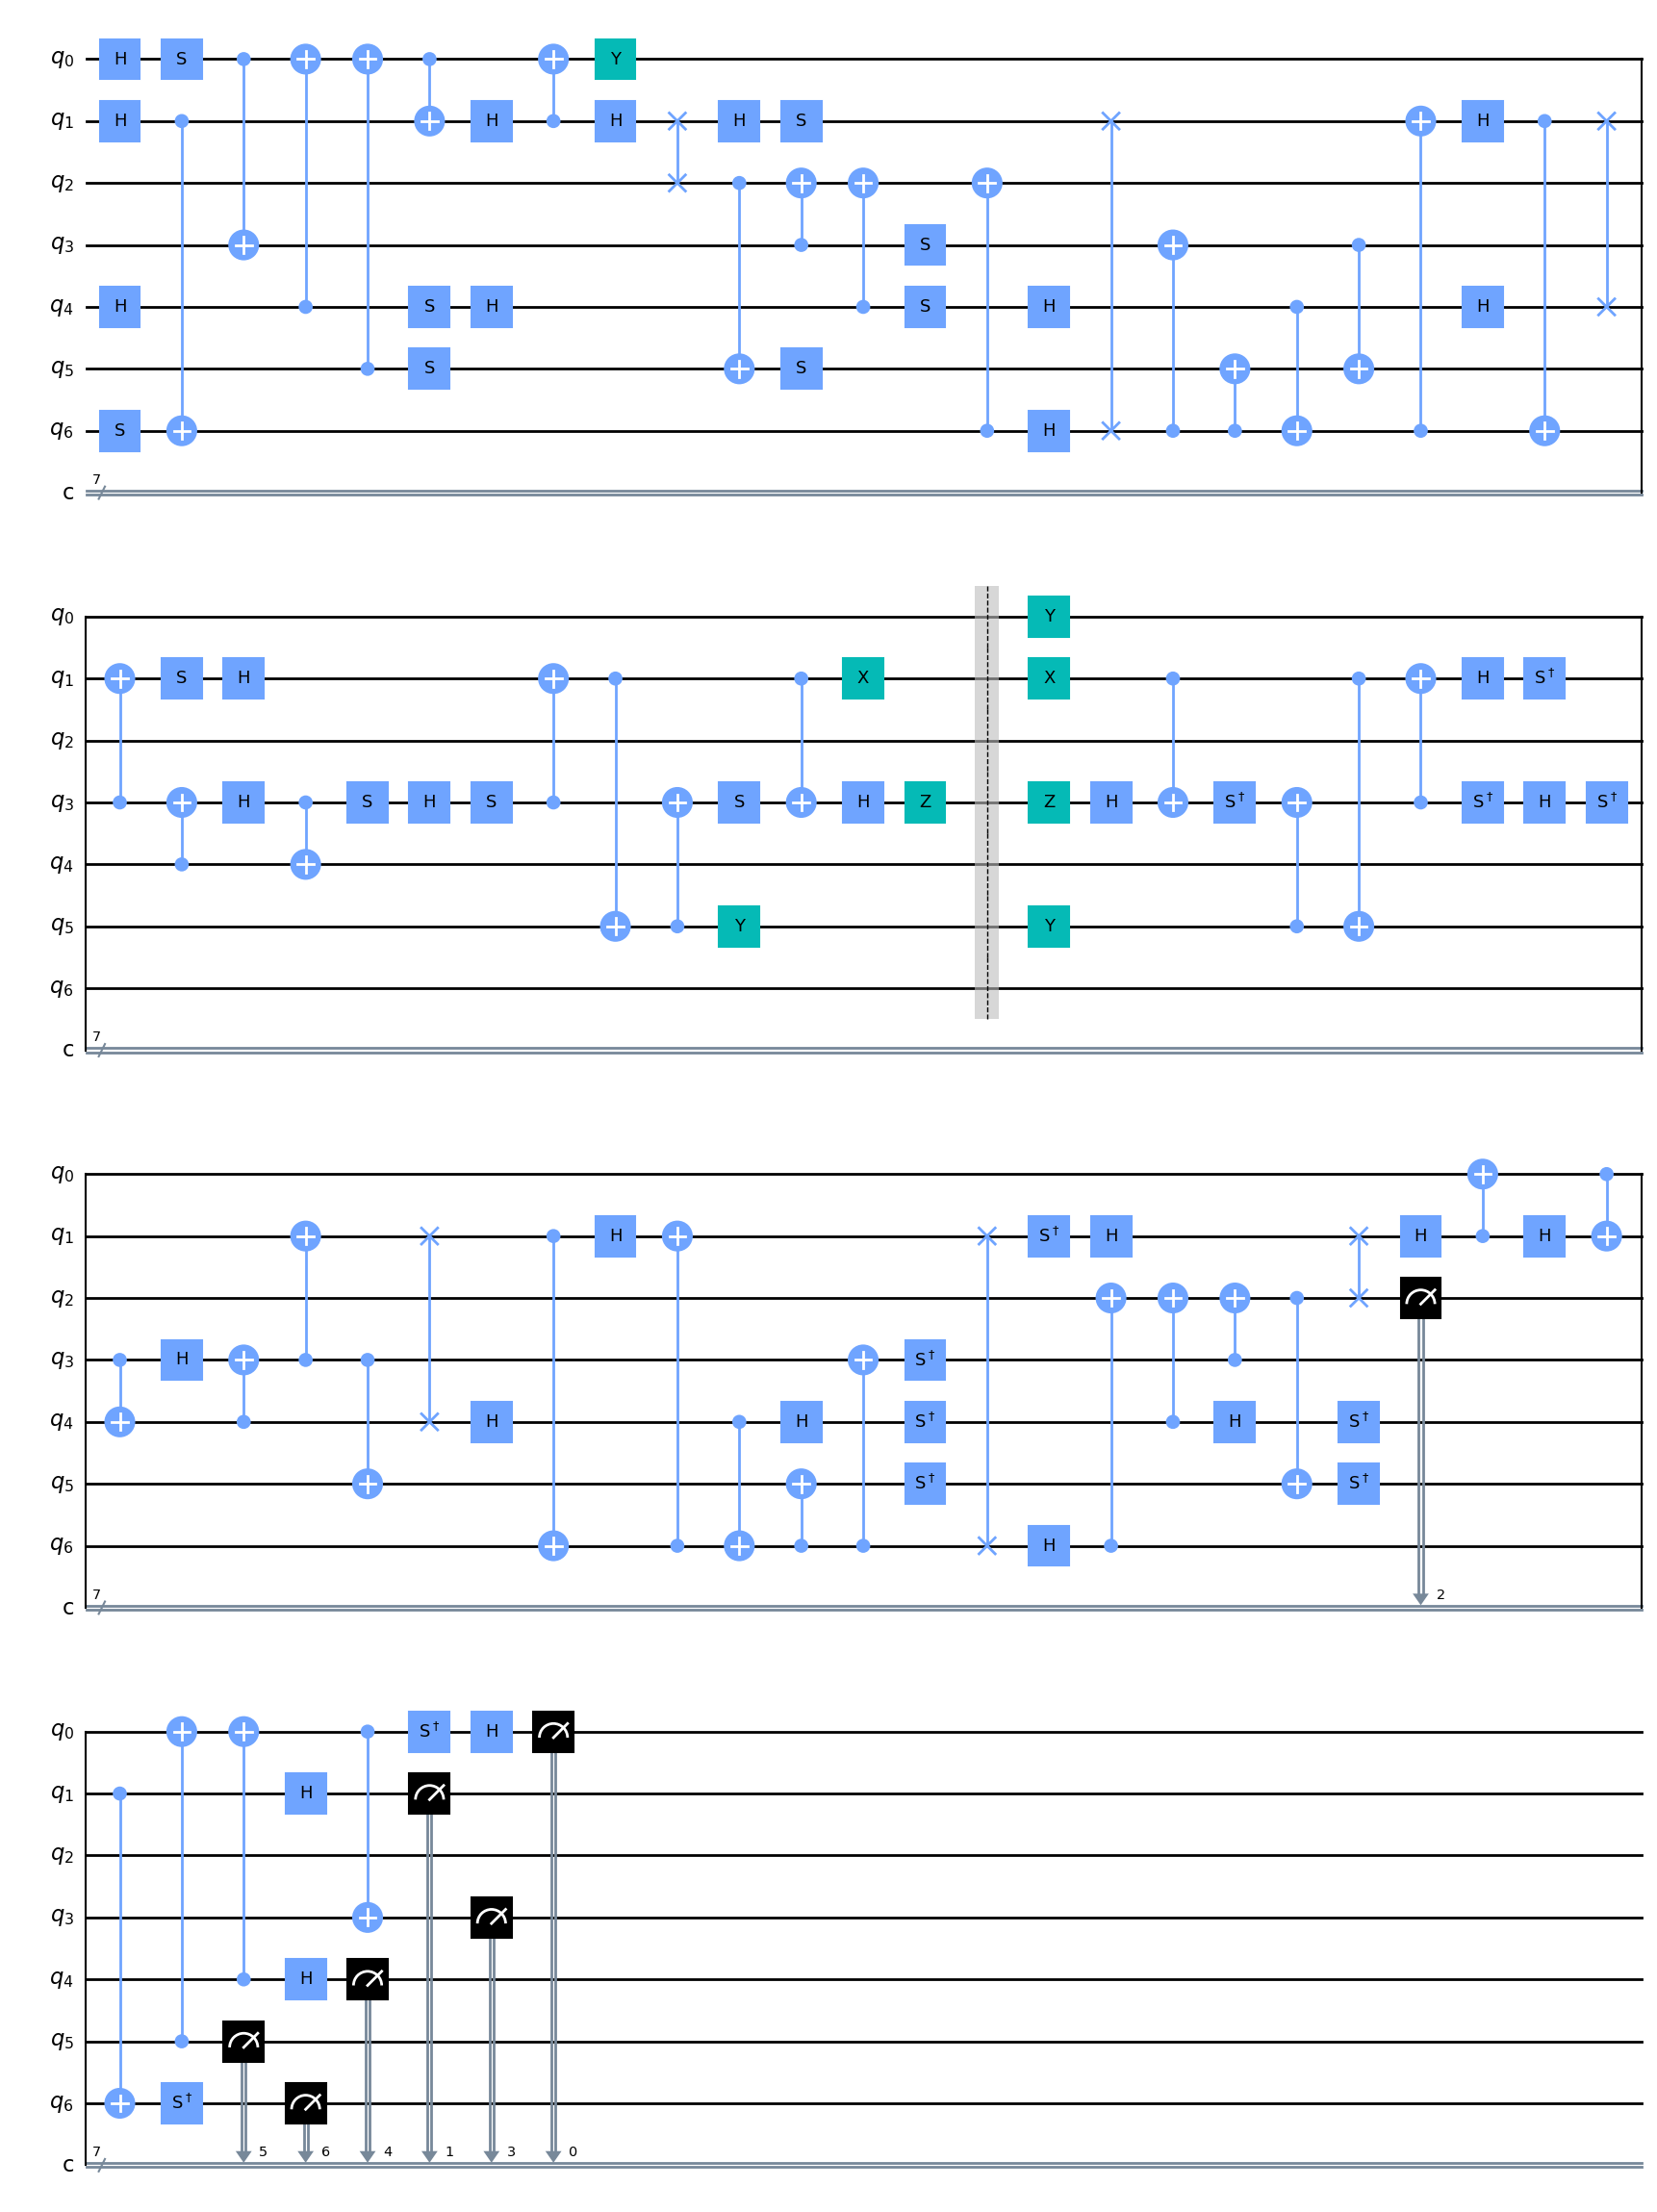

In [5]:
# now insert barrier and reverse -> result, when executing shall ideally be |0...0>
rand_circ_full = reverse_and_compose(rand_circ)
rand_circ_full.draw('mpl')

## GraphState Circuit
- reference: https://github.com/qiskit-community/open-science-prize/blob/main/ibmquantum-graph-states-challenge.ipynb

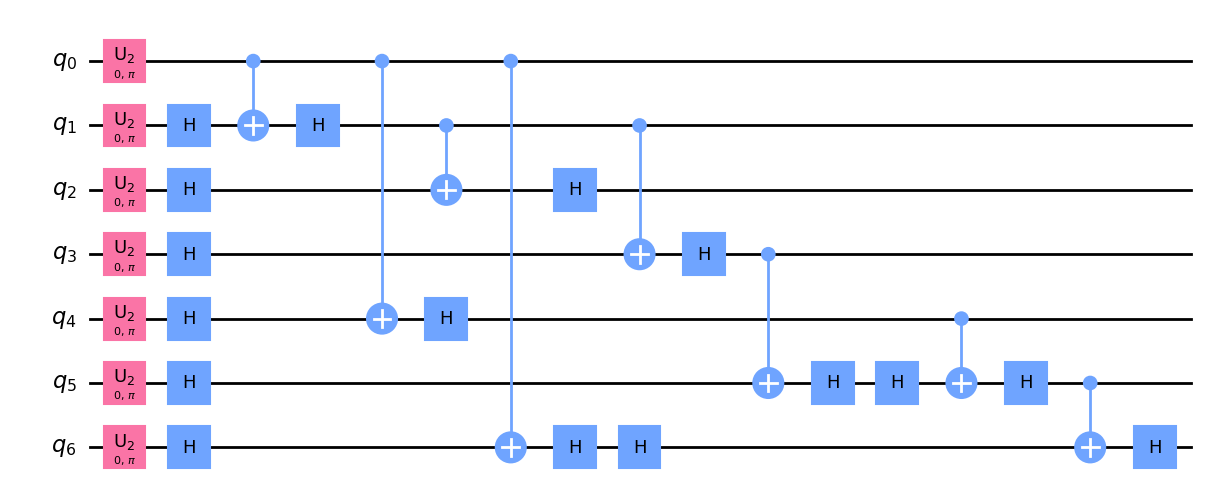

In [6]:
# create Graphstate (example clifford) circuit
from qiskit.circuit.library import GraphState

num_qubits = 7

# adjacency matrix for `ibmq_casablanca`
adjmat = [
    [0, 1, 0, 0, 1, 0, 1], 
    [1, 0, 1, 1, 0, 0, 0], 
    [0, 1, 0, 0, 0, 0, 0], 
    [0, 1, 0, 0, 0, 1, 0], 
    [1, 0, 0, 0, 0, 1, 0], 
    [0, 0, 0, 1, 1, 0, 1], 
    [1, 0, 0, 0, 0, 1, 0]]
graph_state_circuit = GraphState(adjmat)
graph_state_circuit.decompose().decompose().draw('mpl')

In [7]:
# information about graph_state_circuit
print("Depth: ", graph_state_circuit.decompose().decompose().depth())
print("Gates: ", graph_state_circuit.decompose().decompose().size())

Depth:  14
Gates:  31


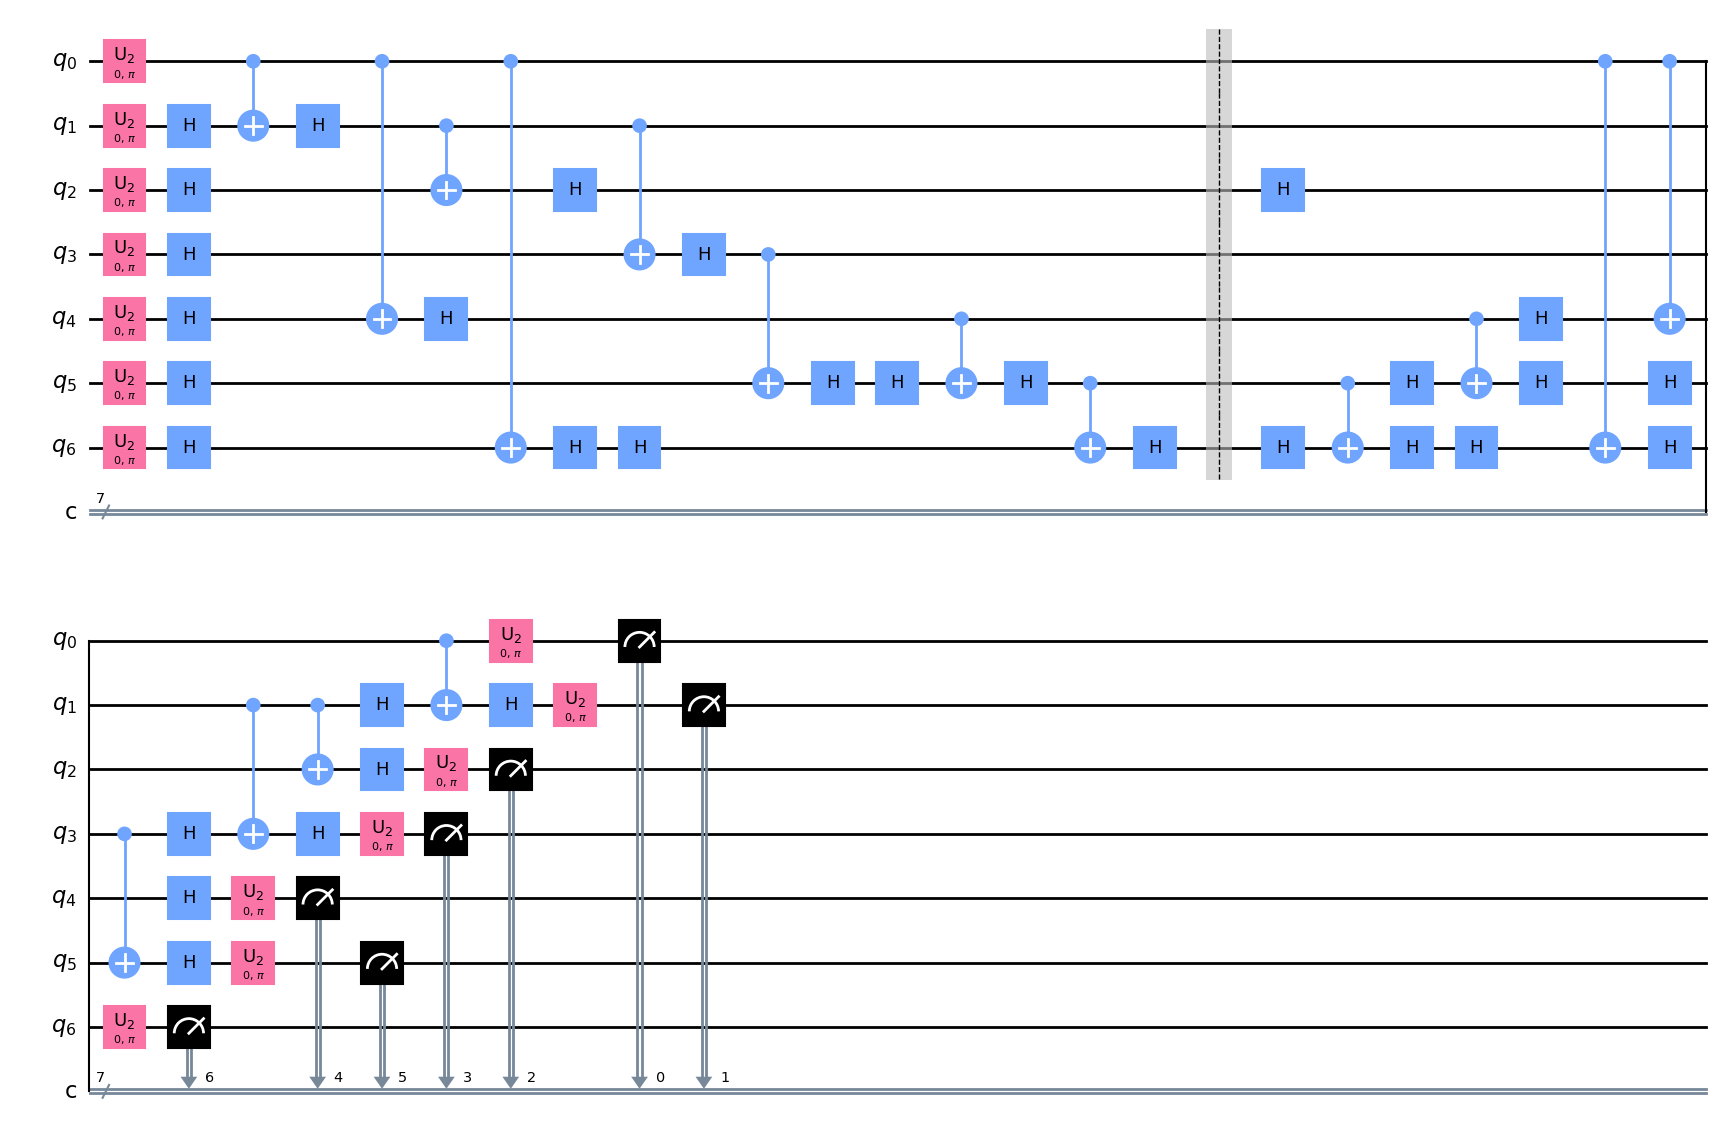

In [8]:
# now insert barrier and reverse -> result, when executing shall ideally be |0...0>
graph_state_circuit_full = reverse_and_compose(graph_state_circuit)
graph_state_circuit_full.decompose().decompose().draw('mpl')

## Execute random and graph-state circuit and compare

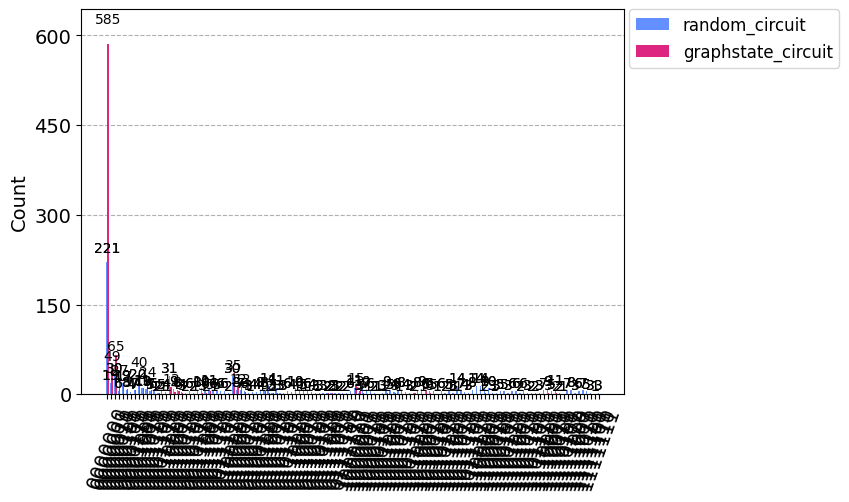

In [9]:
# now on noise hw
backend_hw = FakeMumbaiV2()

job = execute([rand_circ_full, graph_state_circuit_full], backend_hw)
result = job.result()
counts_rand = result.get_counts(0)
counts_graph = result.get_counts(1)
plot_histogram([counts_rand, counts_graph], legend=['random_circuit','graphstate_circuit'])

In [10]:
import qiskit.tools.jupyter

%qiskit_version_table